In [1]:
import sys
sys.path.append('/home/jonas/peppred/src/')
from data import get_data, transform_data

In [2]:
data = transform_data(get_data())

In [3]:
from Bio import motifs

In [33]:
instances = [item['sequence'] for item in data]
len(instances)

2654

## Plot Sequence Lengths

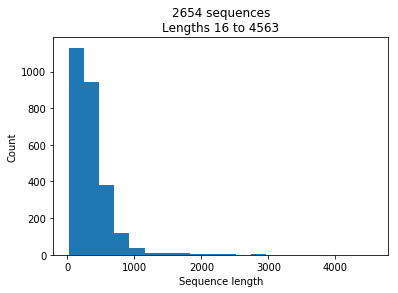

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sizes = [len(rec) for rec in instances]
plt.hist(sizes, bins=20)
plt.title(f"{len(sizes)} sequences\nLengths {min(sizes)} to {max(sizes)}")
plt.xlabel("Sequence length")
plt.ylabel("Count")
plt.show()

## Sequence Motifs

In [22]:
# There are some very short sequences in the training set that we might want to ignore for the sake of making the weblogo
short = [inst for inst in instances if len(inst) < 30]
short

[Seq('GCCSLPPCALSNPDYC', ExtendedIUPACProtein()),
 Seq('NEQSGKSQTVIVGSWGAKVS', ExtendedIUPACProtein()),
 Seq('RSCPRIWMECTRDSDCMAKCICVAGHCG', ExtendedIUPACProtein()),
 Seq('GRNGKSQSIIVGPWGDRVTN', ExtendedIUPACProtein()),
 Seq('GCCSDPRCNMNNPDYC', ExtendedIUPACProtein())]

In [46]:
from Bio.Seq import Seq
m = motifs.create([inst[0:30] for inst in instances if len(inst) > 29])

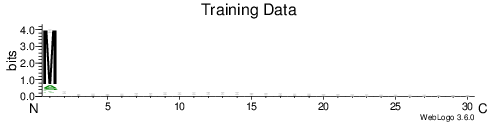

In [47]:
kwds = {
    'logo_title': 'Training Data',
    'symbolsperline': 1,
}
m.weblogo('testlogo.png', **kwds)
from IPython.display import Image
Image("testlogo.png")